## Observations and Insights 

###My comments:

I see that some treatments are better if we look to the plot charts. I also can see that treatments which are more deficient have a higher Std Deviation, since its results do not stick to the desired outcome.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mice=study_results.merge(mouse_metadata, how="outer")

In [2]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [3]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [4]:
mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [5]:
# Checking the number of mice in the DataFrame.
mice["Mouse ID"].count()

1893

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
report=mice.loc[mice.duplicated(subset=["Mouse ID", "Timepoint"])]
report

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
mice.loc[mice["Mouse ID"]=="g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mice_clean=mice.drop_duplicates(subset=["Mouse ID","Timepoint"], inplace=False)
mice_clean

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [9]:
# Checking the number of mice in the clean DataFrame.
len(mice_clean["Mouse ID"].unique())

249

## Summary Statistics

In [10]:
regimes=[]
regimes=mice["Drug Regimen"].unique()
regimes

array(['Capomulin', 'Ketapril', 'Naftisol', 'Infubinol', 'Stelasyn',
       'Ramicane', 'Propriva', 'Zoniferol', 'Placebo', 'Ceftamin'],
      dtype=object)

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Create a DF for each regime
Capomulin_df=mice_clean.loc[mice_clean["Drug Regimen"]=="Capomulin"]
Ketapril_df=mice_clean.loc[mice_clean["Drug Regimen"]=="Ketapril"]
Naftisol_df=mice_clean.loc[mice_clean["Drug Regimen"]=="Naftisol"]
Infubinol_df=mice_clean.loc[mice_clean["Drug Regimen"]=="Infubinol"]
Stelasyn_df=mice_clean.loc[mice_clean["Drug Regimen"]=="Stelasyn"]
Ramicane_df=mice_clean.loc[mice_clean["Drug Regimen"]=="Ramicane"]
Propriva_df=mice_clean.loc[mice_clean["Drug Regimen"]=="Propriva"]
Zoniferol_df=mice_clean.loc[mice_clean["Drug Regimen"]=="Zoniferol"]
Placebo_df=mice_clean.loc[mice_clean["Drug Regimen"]=="Placebo"]
Ceftamin_df=mice_clean.loc[mice_clean["Drug Regimen"]=="Ceftamin"]


# Stick to Tumor size column and Mouse ID only
Capomulin_df=Capomulin_df.drop(['Timepoint', 'Metastatic Sites', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'], axis=1)
Ceftamin_df=Ceftamin_df.drop(['Timepoint', 'Metastatic Sites', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'], axis=1)
Infubinol_df=Infubinol_df.drop(['Timepoint', 'Metastatic Sites', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'], axis=1)
Ketapril_df=Ketapril_df.drop(['Timepoint', 'Metastatic Sites', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'], axis=1)
Naftisol_df=Naftisol_df.drop(['Timepoint', 'Metastatic Sites', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'], axis=1)
Placebo_df=Placebo_df.drop(['Timepoint', 'Metastatic Sites', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'], axis=1)
Propriva_df=Propriva_df.drop(['Timepoint', 'Metastatic Sites', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'], axis=1)
Ramicane_df=Ramicane_df.drop(['Timepoint', 'Metastatic Sites', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'], axis=1)
Stelasyn_df=Stelasyn_df.drop(['Timepoint', 'Metastatic Sites', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'], axis=1)
Zoniferol_df=Zoniferol_df.drop(['Timepoint', 'Metastatic Sites', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'], axis=1)


# Order for Median calculation
Placebo_df.sort_values(axis=0, by='Tumor Volume (mm3)')
Propriva_df.sort_values(axis=0, by='Tumor Volume (mm3)')
Infubinol_df.sort_values(axis=0, by='Tumor Volume (mm3)')
Ketapril_df.sort_values(axis=0, by='Tumor Volume (mm3)')
Capomulin_df.sort_values(axis=0, by='Tumor Volume (mm3)')
Ceftamin_df.sort_values(axis=0, by='Tumor Volume (mm3)')
Naftisol_df.sort_values(axis=0, by='Tumor Volume (mm3)')
Ramicane_df.sort_values(axis=0, by='Tumor Volume (mm3)')
Stelasyn_df.sort_values(axis=0, by='Tumor Volume (mm3)')
Zoniferol_df.sort_values(axis=0, by='Tumor Volume (mm3)')

# Dictionary for each calculation
Mean={
'Capomulin': np.mean(Capomulin_df['Tumor Volume (mm3)']),
'Ceftamin': np.mean(Ceftamin_df['Tumor Volume (mm3)']),
'Infubinol': np.mean(Infubinol_df['Tumor Volume (mm3)']),
'Ketapril': np.mean(Ketapril_df['Tumor Volume (mm3)']),
'Naftisol': np.mean(Naftisol_df['Tumor Volume (mm3)']),
'Placebo': np.mean(Placebo_df['Tumor Volume (mm3)']),
'Propriva': np.mean(Propriva_df['Tumor Volume (mm3)']),
'Ramicane': np.mean(Ramicane_df['Tumor Volume (mm3)']),
'Stelasyn': np.mean(Stelasyn_df['Tumor Volume (mm3)']),
'Zoniferol': np.mean(Zoniferol_df['Tumor Volume (mm3)'])}

Median={
'Capomulin': np.median(Capomulin_df['Tumor Volume (mm3)']),
'Ceftamin': np.median(Ceftamin_df['Tumor Volume (mm3)']),
'Infubinol': np.median(Infubinol_df['Tumor Volume (mm3)']),
'Ketapril': np.median(Ketapril_df['Tumor Volume (mm3)']),
'Naftisol': np.median(Naftisol_df['Tumor Volume (mm3)']),
'Placebo': np.median(Placebo_df['Tumor Volume (mm3)']),
'Propriva': np.median(Propriva_df['Tumor Volume (mm3)']),
'Ramicane': np.median(Ramicane_df['Tumor Volume (mm3)']),
'Stelasyn': np.median(Stelasyn_df['Tumor Volume (mm3)']),
'Zoniferol': np.median(Zoniferol_df['Tumor Volume (mm3)'])}

Var={
'Capomulin': np.var(Capomulin_df['Tumor Volume (mm3)']),
'Ceftamin': np.var(Ceftamin_df['Tumor Volume (mm3)']),
'Infubinol': np.var(Infubinol_df['Tumor Volume (mm3)']),
'Ketapril': np.var(Ketapril_df['Tumor Volume (mm3)']),
'Naftisol': np.var(Naftisol_df['Tumor Volume (mm3)']),
'Placebo': np.var(Placebo_df['Tumor Volume (mm3)']),
'Propriva': np.var(Propriva_df['Tumor Volume (mm3)']),
'Ramicane': np.var(Ramicane_df['Tumor Volume (mm3)']),
'Stelasyn': np.var(Stelasyn_df['Tumor Volume (mm3)']),
'Zoniferol': np.var(Zoniferol_df['Tumor Volume (mm3)'])}

STD={
'Capomulin': np.std(Capomulin_df['Tumor Volume (mm3)']),
'Ceftamin': np.std(Ceftamin_df['Tumor Volume (mm3)']),
'Infubinol': np.std(Infubinol_df['Tumor Volume (mm3)']),
'Ketapril': np.std(Ketapril_df['Tumor Volume (mm3)']),
'Naftisol': np.std(Naftisol_df['Tumor Volume (mm3)']),
'Placebo': np.std(Placebo_df['Tumor Volume (mm3)']),
'Propriva': np.std(Propriva_df['Tumor Volume (mm3)']),
'Ramicane': np.std(Ramicane_df['Tumor Volume (mm3)']),
'Stelasyn': np.std(Stelasyn_df['Tumor Volume (mm3)']),
'Zoniferol': np.std(Zoniferol_df['Tumor Volume (mm3)'])}

SEM={
'Capomulin': st.sem(Capomulin_df['Tumor Volume (mm3)']),
'Ceftamin': st.sem(Ceftamin_df['Tumor Volume (mm3)']),
'Infubinol': st.sem(Infubinol_df['Tumor Volume (mm3)']),
'Ketapril': st.sem(Ketapril_df['Tumor Volume (mm3)']),
'Naftisol': st.sem(Naftisol_df['Tumor Volume (mm3)']),
'Placebo': st.sem(Placebo_df['Tumor Volume (mm3)']),
'Propriva': st.sem(Propriva_df['Tumor Volume (mm3)']),
'Ramicane': st.sem(Ramicane_df['Tumor Volume (mm3)']),
'Stelasyn': st.sem(Stelasyn_df['Tumor Volume (mm3)']),
'Zoniferol': st.sem(Zoniferol_df['Tumor Volume (mm3)'])}


Summary=pd.DataFrame(data=(Mean, Var, Median, STD, SEM), index=['Mean', 'Variance', 'Median', 'Std Dev', 'Std. Err. Mean'])

Summary

# This method is the most straighforward, creating multiple series and putting them all together at the end.

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Mean,40.675741,52.591172,52.884795,55.235638,54.331565,54.033581,52.393463,40.216745,54.233149,53.236507
Variance,24.839296,39.069446,42.886388,68.188930,65.817708,60.830138,42.862273,23.383692,59.122106,48.266689
Median,41.557809,51.776157,51.820584,53.698743,52.509285,52.288934,50.909965,40.673236,52.431737,51.818479
Std Dev,4.983904,6.250556,6.548770,8.257659,8.112811,7.799368,6.546928,4.835669,7.689090,6.947423
Std. Err. Mean,0.329346,0.469821,0.492236,0.603860,0.596466,0.581331,0.525862,0.320955,0.573111,0.516398


## Bar Plots

In [12]:
# Re defining DF for plot usage

Capomulin_df=mice_clean.loc[mice_clean["Drug Regimen"]=="Capomulin"]
Ketapril_df=mice_clean.loc[mice_clean["Drug Regimen"]=="Ketapril"]
Naftisol_df=mice_clean.loc[mice_clean["Drug Regimen"]=="Naftisol"]
Infubinol_df=mice_clean.loc[mice_clean["Drug Regimen"]=="Infubinol"]
Stelasyn_df=mice_clean.loc[mice_clean["Drug Regimen"]=="Stelasyn"]
Ramicane_df=mice_clean.loc[mice_clean["Drug Regimen"]=="Ramicane"]
Propriva_df=mice_clean.loc[mice_clean["Drug Regimen"]=="Propriva"]
Zoniferol_df=mice_clean.loc[mice_clean["Drug Regimen"]=="Zoniferol"]
Placebo_df=mice_clean.loc[mice_clean["Drug Regimen"]=="Placebo"]
Ceftamin_df=mice_clean.loc[mice_clean["Drug Regimen"]=="Ceftamin"]

In [13]:
# Creating groupby object for plot calculation

Capomulin_df=Capomulin_df.groupby("Timepoint")["Mouse ID"].count().to_frame()
Ceftamin_df=Ceftamin_df.groupby('Timepoint')['Mouse ID'].count().to_frame()
Infubinol_df=Infubinol_df.groupby('Timepoint')['Mouse ID'].count().to_frame()
Ketapril_df=Ketapril_df.groupby('Timepoint')['Mouse ID'].count().to_frame()
Naftisol_df=Naftisol_df.groupby('Timepoint')['Mouse ID'].count().to_frame()
Placebo_df=Placebo_df.groupby('Timepoint')['Mouse ID'].count().to_frame()
Propriva_df=Propriva_df.groupby('Timepoint')['Mouse ID'].count().to_frame()
Ramicane_df=Ramicane_df.groupby('Timepoint')['Mouse ID'].count().to_frame()
Stelasyn_df=Stelasyn_df.groupby('Timepoint')['Mouse ID'].count().to_frame()
Zoniferol_df=Zoniferol_df.groupby('Timepoint')['Mouse ID'].count().to_frame()


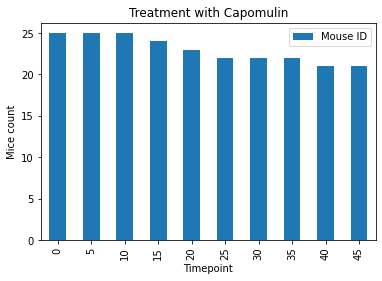

In [14]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
Capomulin_df.plot(kind="bar")
plt.ylabel("Mice count")
plt.title("Treatment with Capomulin")
plt.show()

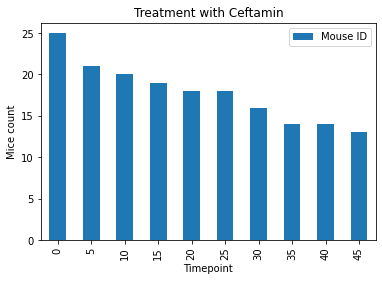

In [15]:
Ceftamin_df.plot(kind='bar')
plt.ylabel('Mice count')
plt.title('Treatment with Ceftamin')
plt.show()

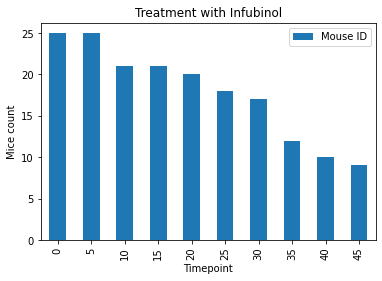

In [16]:
Infubinol_df.plot(kind='bar')
plt.ylabel('Mice count')
plt.title('Treatment with Infubinol')
plt.show()

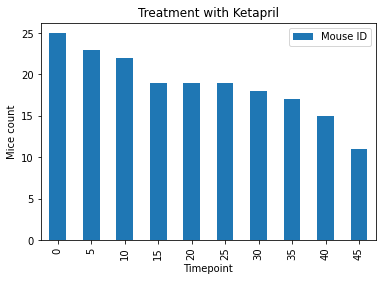

In [17]:
Ketapril_df.plot(kind='bar')
plt.ylabel('Mice count')
plt.title('Treatment with Ketapril')
plt.show()


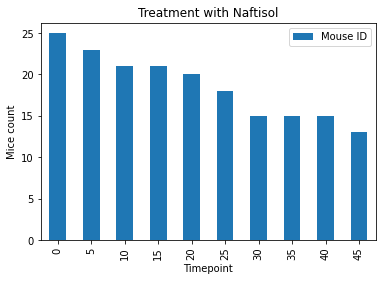

In [18]:
Naftisol_df.plot(kind='bar')
plt.ylabel('Mice count')
plt.title('Treatment with Naftisol')
plt.show()


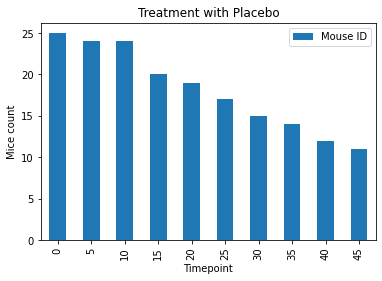

In [19]:
Placebo_df.plot(kind='bar')
plt.ylabel('Mice count')
plt.title('Treatment with Placebo')
plt.show()


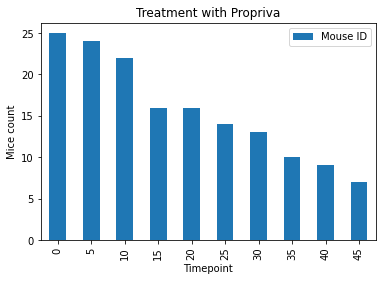

In [20]:
Propriva_df.plot(kind='bar')
plt.ylabel('Mice count')
plt.title('Treatment with Propriva')
plt.show()


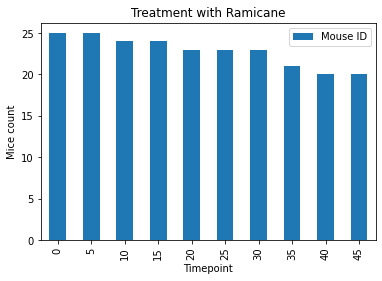

In [21]:
Ramicane_df.plot(kind='bar')
plt.ylabel('Mice count')
plt.title('Treatment with Ramicane')
plt.show()


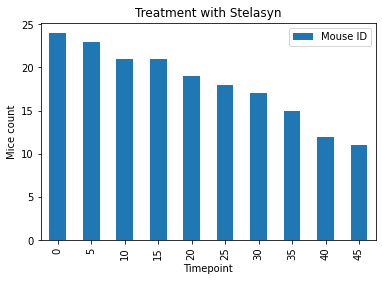

In [22]:
Stelasyn_df.plot(kind='bar')
plt.ylabel('Mice count')
plt.title('Treatment with Stelasyn')
plt.show()


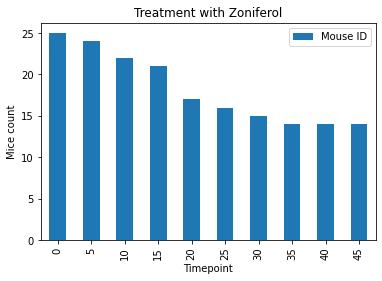

In [23]:
Zoniferol_df.plot(kind='bar')
plt.ylabel('Mice count')
plt.title('Treatment with Zoniferol')
plt.show()


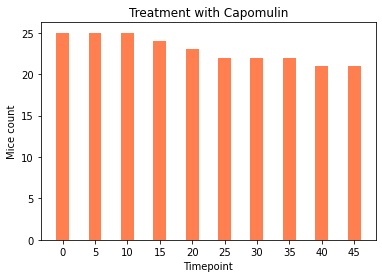

In [24]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

plt.bar(np.arange(0,50,5), Capomulin_df["Mouse ID"], width=2, color="coral")
plt.xlabel("Timepoint")
plt.xticks([0,5,10,15,20,25,30,35,40,45])
plt.ylabel("Mice count")
plt.title("Treatment with Capomulin")
plt.show()


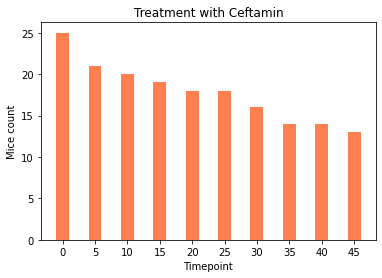

In [25]:
plt.bar(np.arange(0,50,5), Ceftamin_df['Mouse ID'], width=2, color='coral')
plt.xlabel("Timepoint")
plt.xticks([0,5,10,15,20,25,30,35,40,45])
plt.ylabel("Mice count")
plt.title('Treatment with Ceftamin')
plt.show()


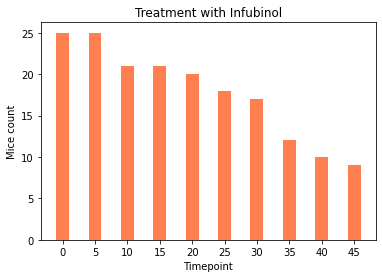

In [26]:
plt.bar(np.arange(0,50,5), Infubinol_df['Mouse ID'], width=2, color='coral')
plt.xlabel("Timepoint")
plt.xticks([0,5,10,15,20,25,30,35,40,45])
plt.ylabel("Mice count")
plt.title('Treatment with Infubinol')
plt.show()


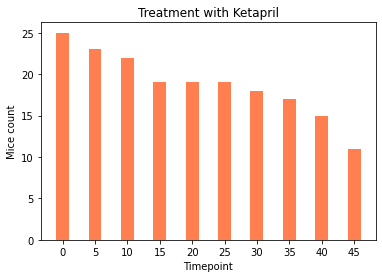

In [27]:
plt.bar(np.arange(0,50,5), Ketapril_df['Mouse ID'], width=2, color='coral')
plt.xlabel("Timepoint")
plt.xticks([0,5,10,15,20,25,30,35,40,45])
plt.ylabel("Mice count")
plt.title('Treatment with Ketapril')
plt.show()


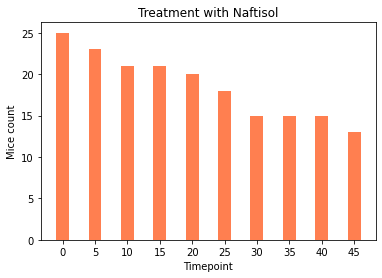

In [28]:
plt.bar(np.arange(0,50,5), Naftisol_df['Mouse ID'], width=2, color='coral')
plt.xlabel("Timepoint")
plt.xticks([0,5,10,15,20,25,30,35,40,45])
plt.ylabel("Mice count")
plt.title('Treatment with Naftisol')
plt.show()


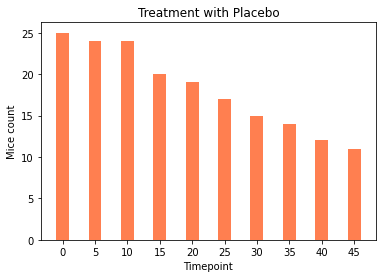

In [29]:
plt.bar(np.arange(0,50,5), Placebo_df['Mouse ID'], width=2, color='coral')
plt.xlabel("Timepoint")
plt.xticks([0,5,10,15,20,25,30,35,40,45])
plt.ylabel("Mice count")
plt.title('Treatment with Placebo')
plt.show()


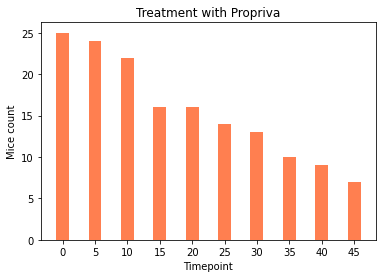

In [30]:
plt.bar(np.arange(0,50,5), Propriva_df['Mouse ID'], width=2, color='coral')
plt.xlabel("Timepoint")
plt.xticks([0,5,10,15,20,25,30,35,40,45])
plt.ylabel("Mice count")
plt.title('Treatment with Propriva')
plt.show()


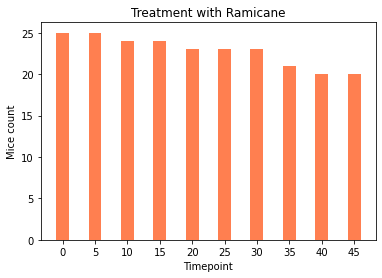

In [31]:
plt.bar(np.arange(0,50,5), Ramicane_df['Mouse ID'], width=2, color='coral')
plt.xlabel("Timepoint")
plt.xticks([0,5,10,15,20,25,30,35,40,45])
plt.ylabel("Mice count")
plt.title('Treatment with Ramicane')
plt.show()


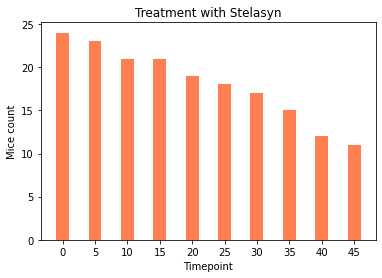

In [32]:
plt.bar(np.arange(0,50,5), Stelasyn_df['Mouse ID'], width=2, color='coral')
plt.xlabel("Timepoint")
plt.xticks([0,5,10,15,20,25,30,35,40,45])
plt.ylabel("Mice count")
plt.title('Treatment with Stelasyn')
plt.show()


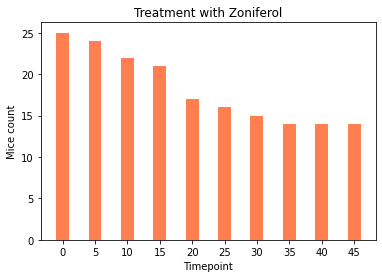

In [33]:
plt.bar(np.arange(0,50,5), Zoniferol_df['Mouse ID'], width=2, color='coral')
plt.xlabel("Timepoint")
plt.xticks([0,5,10,15,20,25,30,35,40,45])
plt.ylabel("Mice count")
plt.title('Treatment with Zoniferol')
plt.show()


## Pie Plots

In [34]:
ID_df=pd.DataFrame(mice_clean["Mouse ID"])
Sex_df=pd.DataFrame(mice_clean["Sex"])
ID_df=ID_df.join(Sex_df, how="outer")
ID_df=ID_df.drop_duplicates(subset=["Mouse ID"], inplace=False)
ID_df=ID_df.groupby("Sex").count()
ID_df

,Mouse ID
Sex,
Female,124
Male,125


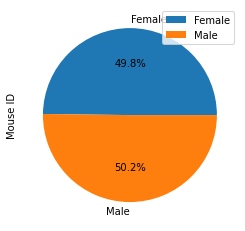

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
ID_df.plot(kind="pie", y="Mouse ID", autopct='%1.1f%%')

plt.show()


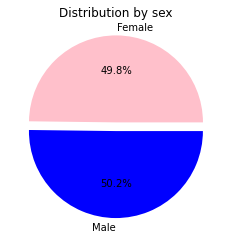

In [36]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(ID_df["Mouse ID"], explode=[0.1, 0], autopct='%1.1f%%', colors=["pink", "blue"], labels=["Female", "Male"])

plt.title("Distribution by sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [37]:
# Re defining DF for plot usage

Capomulin_df=mice_clean.loc[mice_clean["Drug Regimen"]=="Capomulin"]
Ketapril_df=mice_clean.loc[mice_clean["Drug Regimen"]=="Ketapril"]
Naftisol_df=mice_clean.loc[mice_clean["Drug Regimen"]=="Naftisol"]
Infubinol_df=mice_clean.loc[mice_clean["Drug Regimen"]=="Infubinol"]
Stelasyn_df=mice_clean.loc[mice_clean["Drug Regimen"]=="Stelasyn"]
Ramicane_df=mice_clean.loc[mice_clean["Drug Regimen"]=="Ramicane"]
Propriva_df=mice_clean.loc[mice_clean["Drug Regimen"]=="Propriva"]
Zoniferol_df=mice_clean.loc[mice_clean["Drug Regimen"]=="Zoniferol"]
Placebo_df=mice_clean.loc[mice_clean["Drug Regimen"]=="Placebo"]
Ceftamin_df=mice_clean.loc[mice_clean["Drug Regimen"]=="Ceftamin"]

Capomulin_df=Capomulin_df.loc[Capomulin_df["Timepoint"]==45]
Ketapril_df=Ketapril_df.loc[Ketapril_df["Timepoint"]==45]
Naftisol_df=Naftisol_df.loc[Naftisol_df["Timepoint"]==45]
Infubinol_df=Infubinol_df.loc[Infubinol_df["Timepoint"]==45]
Stelasyn_df=Stelasyn_df.loc[Stelasyn_df["Timepoint"]==45]
Ramicane_df=Ramicane_df.loc[Ramicane_df["Timepoint"]==45]
Propriva_df=Propriva_df.loc[Propriva_df["Timepoint"]==45]
Zoniferol_df=Zoniferol_df.loc[Zoniferol_df["Timepoint"]==45]
Placebo_df=Placebo_df.loc[Placebo_df["Timepoint"]==45]
Ceftamin_df=Ceftamin_df.loc[mice_clean["Timepoint"]==45]

# Calculation for IQR

Capomulin_df.sort_values(axis=0, by='Tumor Volume (mm3)')
Ramicane_df.sort_values(axis=0, by='Tumor Volume (mm3)')
Infubinol_df.sort_values(axis=0, by='Tumor Volume (mm3)')
Ceftamin_df.sort_values(axis=0, by='Tumor Volume (mm3)')


# Calculation for quartiles
Capomulin_quart=Capomulin_df["Tumor Volume (mm3)"].quantile([0.25, 0.50, 0.75])
Ramicane_quart=Ramicane_df["Tumor Volume (mm3)"].quantile([0.25, 0.50, 0.75])
Infubinol_quart=Infubinol_df["Tumor Volume (mm3)"].quantile([0.25, 0.50, 0.75])
Ceftamin_quart=Ceftamin_df["Tumor Volume (mm3)"].quantile([0.25, 0.50, 0.75])

# Determination  of low and high quartiles
low_Capo = Capomulin_quart[0.25]
low_Rami = Ramicane_quart[0.25]
low_Infubinol = Infubinol_quart[0.25]
low_Cefta = Ceftamin_quart[0.25]

high_Capo = Capomulin_quart[0.75]
high_Rami = Ramicane_quart[0.75]
high_Infubinol = Infubinol_quart[0.75]
high_Cefta = Ceftamin_quart[0.75]


# IQR operations
iqr_Capo = high_Capo - low_Capo
iqr_Rami = high_Rami - low_Rami
iqr_Infubinol = high_Infubinol - low_Infubinol
iqr_Cefta = high_Cefta - low_Cefta

# Result
print("The IQR are (Capomulin, Ramicane, Infubinol, Ceftamin):")
print(iqr_Capo, iqr_Rami, iqr_Infubinol, iqr_Cefta)

# Bounds for outliers
lower_bound_Capo = low_Capo - (1.5*iqr_Capo)
lower_bound_Rami = low_Rami - (1.5*iqr_Rami)
lower_bound_Infubinol = low_Infubinol - (1.5*iqr_Infubinol)
lower_bound_Cefta = low_Cefta - (1.5*iqr_Cefta)

higher_bound_Capo = high_Capo + (1.5*iqr_Capo)
higher_bound_Rami = high_Rami + (1.5*iqr_Rami)
higher_bound_Infubinol = high_Infubinol + (1.5*iqr_Infubinol)
higher_bound_Cefta = high_Cefta + (1.5*iqr_Cefta)


The IQR are (Capomulin, Ramicane, Infubinol, Ceftamin):
7.781863460000004 7.527130082499998 4.9311172099999965 6.093590140000003


In [38]:
outliers_Capo = Capomulin_df.loc[(Capomulin_df['Tumor Volume (mm3)']<lower_bound_Capo) | (Capomulin_df['Tumor Volume (mm3)']>higher_bound_Capo)]
outliers_Rami = Ramicane_df.loc[(Ramicane_df['Tumor Volume (mm3)']<lower_bound_Rami) | (Ramicane_df['Tumor Volume (mm3)']>higher_bound_Rami)]
outliers_Infubinol = Infubinol_df.loc[(Infubinol_df['Tumor Volume (mm3)']<lower_bound_Infubinol) | (Infubinol_df['Tumor Volume (mm3)']>higher_bound_Infubinol)]
outliers_Cefta = Ceftamin_df.loc[(Ceftamin_df['Tumor Volume (mm3)']<lower_bound_Cefta) | (Ceftamin_df['Tumor Volume (mm3)']>higher_bound_Cefta)]

In [39]:
len(outliers_Capo)

0

In [40]:
len(outliers_Rami)

0

In [41]:
len(outliers_Infubinol)

0

In [42]:
len(outliers_Cefta)

0

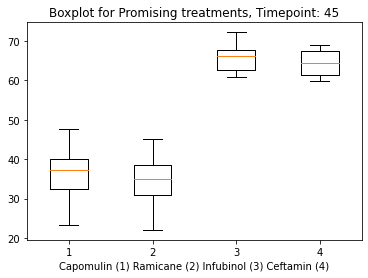

In [43]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

green_diamond = dict(markerfacecolor='g', marker='D')
data=[Capomulin_df["Tumor Volume (mm3)"], Ramicane_df["Tumor Volume (mm3)"], Infubinol_df["Tumor Volume (mm3)"], Ceftamin_df["Tumor Volume (mm3)"]]
plt.boxplot(data, flierprops=green_diamond)
plt.xlabel("Capomulin (1) Ramicane (2) Infubinol (3) Ceftamin (4)")

plt.title("Boxplot for Promising treatments, Timepoint: 45")
plt.show()



## Line and Scatter Plots

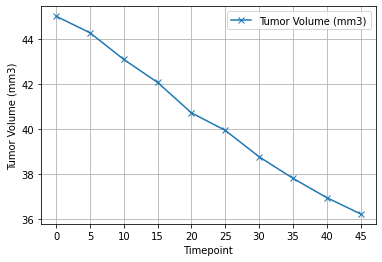

In [44]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Capomulin_df=mice_clean.loc[mice_clean["Drug Regimen"]=="Capomulin"]
Cap_plot=Capomulin_df.groupby("Timepoint")['Tumor Volume (mm3)'].mean().to_frame()
Cap_plot.plot(kind="line", marker="x")
plt.xticks([0,5,10,15,20,25,30,35,40,45])
plt.ylabel("Tumor Volume (mm3)")
plt.grid(True)
plt.show()

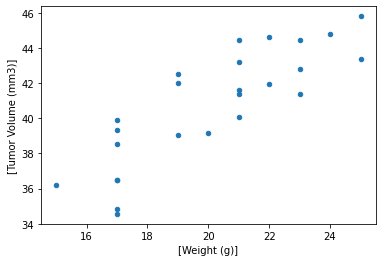

In [45]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
A1=Capomulin_df.groupby("Mouse ID")["Weight (g)"].mean().to_frame()
A2=Capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean().to_frame()

A3=A1.merge(A2, on="Mouse ID", how="left")

A3.plot(kind="scatter", x=["Weight (g)"], y=["Tumor Volume (mm3)"])
plt.show()

## Correlation and Regression

In [46]:
# Calculate the correlation coefficient and linear regression model
# for mouse weight and average tumor volume for the Capomulin regimen

(slope,intercept,rvalue,pvalue,stderr)=st.linregress(A3["Weight (g)"], A3["Tumor Volume (mm3)"])
print(slope,intercept,rvalue,pvalue,stderr)

x_values=A3["Weight (g)"]

regress_values=x_values*slope+intercept

r_square=rvalue**2


0.9544396890241045 21.552160532685015 0.8419363424694718 1.3225722434712642e-07 0.12754359033201337


y=0.95x+21.55
r^2 value: 0.7089


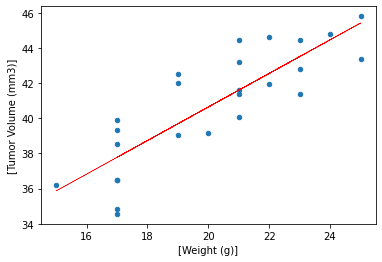

In [47]:
line_equation=(f'y={round(slope,2)}x+{round(intercept,2)}')
A3.plot(kind="scatter", x=["Weight (g)"], y=["Tumor Volume (mm3)"])
plt.plot(x_values, regress_values, color="red", linestyle="solid", linewidth=0.5)
print(line_equation)
print(f'r^2 value: {round(r_square,4)}')
plt.show()
